In [1]:
from dataset import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
torch.manual_seed(0)
torch.cuda.manual_seed(0)
data_path = '/data/lzt/project/waysguider_3/dataset'


In [2]:
dataset = GuiderDataset(data_path,0.2,max_len=12,min_len=20)
data = dataset.data



Data Preprocess Done!
Dataset size:0, train:10000, val:1806


## raw

In [3]:
len(data)

6760

In [3]:
def interval(seq):
    intervals = []
    seq = seq[:-1]
    seq_ = seq[1:]
    seq = seq[:-1]
    for i in range(len(seq)):
        inter = np.sqrt((seq[i][0] - seq_[i][0]) ** 2 + (seq[i][1] - seq_[i][1]) ** 2).item()
        intervals.append(inter)
    return intervals

In [4]:
length = []
intervals_avg = []
for seq in data:
    length.append(len(seq))
    intervals_avg.append(np.array(interval(seq)).mean().item())
summary = pd.DataFrame()
summary['id'] = list(range(len(data)))
summary['length'] = length
summary['avg_inter'] = intervals_avg

In [6]:
summary.to_csv('summary.csv')

In [7]:
max(summary['length'])

21

5435


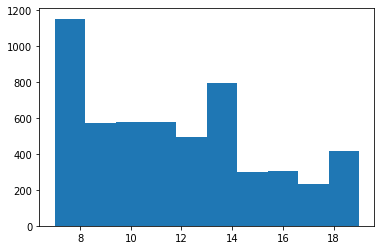

In [11]:
plt.hist(summary['length'].loc[summary['length']<20].loc[summary['length']>6])
print(summary['length'].loc[summary['length']<20].loc[summary['length']>6].shape[0])

6670


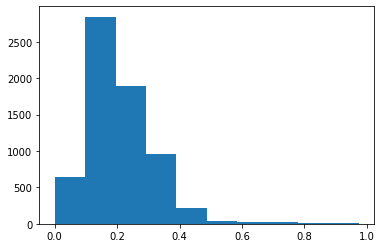

In [5]:
plt.hist(summary['avg_inter'].loc[summary['avg_inter']<1])
print(summary['avg_inter'].loc[summary['avg_inter']<1].shape[0])

6760


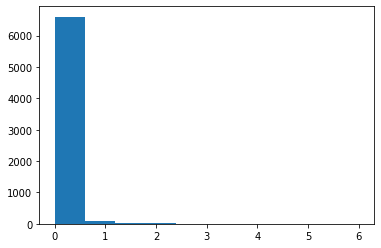

In [7]:
plt.hist(summary['avg_inter'])
print(summary['avg_inter'].shape[0])

In [4]:
cache = []
for i in range(len(data)):
    cache.extend(interval(data[i]))

(array([1.30672e+05, 1.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([6.23626743e-08, 5.28626780e-01, 1.05725350e+00, 1.58588021e+00,
        2.11450693e+00, 2.64313365e+00, 3.17176037e+00, 3.70038708e+00,
        4.22901380e+00, 4.75764052e+00, 5.28626724e+00]),
 <a list of 10 Patch objects>)

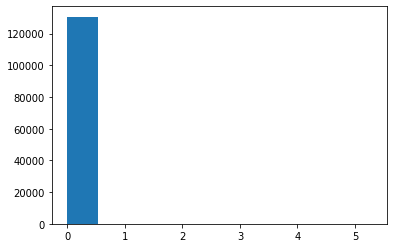

In [5]:
import matplotlib.pyplot as plt
plt.hist(cache)

In [6]:
cache[1:10]

[0.05754787463633821,
 0.04242741915497592,
 0.028463778829250976,
 0.015981864959769436,
 0.007442697710512366,
 0.007299108112575403,
 0.006161953280213028,
 0.0031523514937913753,
 0.01480775541225814]

In [9]:
print(max(cache))
print(min(cache))

5.286267235676357
6.23626743237986e-08


In [8]:
data[0]

[[0.4162920025199994, 0.0],
 [0.3869267398347111, 0.006356128040940765],
 [0.3302952330230998, 0.016585023944513364],
 [0.28820587800652736, 0.021930310694627402],
 [0.25975802097893236, 0.022882222338652027],
 [0.24405100813213684, 0.01993099292992983],
 [0.23979825081133627, 0.013822981438417791],
 [0.24286086062119278, 0.0071974701078384865],
 [0.24782153997728748, 0.0035421549978180223],
 [0.24925696106822348, 0.0063487340955996644],
 [0.24174379607837065, 0.019108905418293964],
 [0.22030825665418663, 0.044413036573577855],
 [0.18371616963476955, 0.07735353524010546],
 [0.13258790022847408, 0.10930444410577989],
 [0.06755714425762496, 0.13161307784322113],
 [-4.2332006896639744e-13, 0.13507609029931378],
 '8_7']

## torch

In [18]:
import torch.utils.data as Data
dataloader = Data.DataLoader(dataset,batch_size = 32)
data_cache = []
for i,data in enumerate(dataloader):
    seq = data['seq']
    for i in range(seq.shape[0]):
        data_cache.append(seq[i])

In [36]:
def interval_tensor(seq):
    #seq = seq.tolist()
    seq_ = np.array(seq[1:])
    seq = np.array(seq[:-1])
    intervals = np.sqrt(np.power(seq-seq_,2).sum(axis=1)).mean()

    return intervals

In [37]:
x = [[1,1],[1,4],[5,4]]
interval_tensor(x)

3.5

In [30]:
cache = []
for i in range(len(data_cache)):
    cache.extend(interval_tensor(data_cache[i]))


TypeError: 'float' object is not iterable

In [ ]:
cache = []
for seq in range(len(data_cache)):
    seq = seq.tolist()
    seq_ = np.array(seq[1:])
    seq = np.array(seq[:-1])
    intervals = np.sqrt(np.power(seq-seq_,2).sum(axis=1)).mean().item()


    cache.append()

(array([6.5514e+04, 1.8150e+03, 7.0000e+00, 1.0000e+02, 1.4900e+02,
        7.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([ 0.       ,  1.1000063,  2.2000126,  3.3000189,  4.4000252,
         5.5000315,  6.6000378,  7.7000441,  8.8000504,  9.9000567,
        11.000063 ]),
 <a list of 10 Patch objects>)

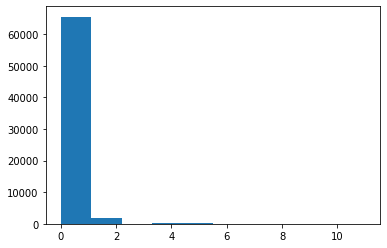

In [21]:
plt.hist(cache)

In [22]:
len(cache)

67600

28542

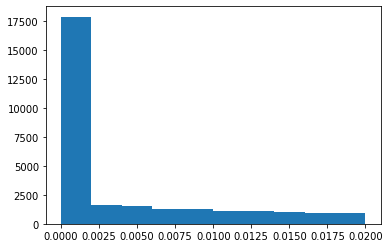

In [38]:
cache_ = []
for i in range(len(cache)):
    if cache[i] < 0.02:
        cache_.append(cache[i])
plt.hist(cache_)
len(cache_)

In [24]:
len(cache)

280230

In [25]:
cache[:10]

[0.030045291207738665,
 0.057547873360788586,
 0.0424274073110391,
 0.028463788256612922,
 0.015981868316956988,
 0.007442699851365554,
 0.007299106352051039,
 0.006161958485481472,
 0.0031523551468084074,
 0.014807754750534507]

## some test

In [12]:
import numpy as np
max_len = 6
weights = np.array([_*0.5 for _ in range(max_len)])
weights = np.exp(-weights)
weights_inv = weights[::-1]
weights = np.vstack([weights,weights_inv])
weights /= weights.sum(axis=0)
weights_inv = weights[1,:]
weights = weights[0,:]

In [13]:
weights

array([0.92414182, 0.81757448, 0.62245933, 0.37754067, 0.18242552,
       0.07585818])

In [14]:
weights_inv

array([0.07585818, 0.18242552, 0.37754067, 0.62245933, 0.81757448,
       0.92414182])

## feature map

In [1]:
import torch
import torch.utils.data as Data
import torchvision.transforms as transfroms
from model import *
from dataset import *
import matplotlib.pyplot as plt

In [4]:
checkpoint = './checkpoint/checkpoint_best.pth'
data_path = '/data/lzt/project/waysguider_3/dataset/'
output_path = './pred_vis/'

# checkpoint = torch.load(checkpoint)
# decoder = checkpoint['decoder']
# encoder = checkpoint['encoder']

# decoder.eval()
# encoder.eval()

dataset = GuiderDataset(data_path,0.2,max_len=12)
pred_loader = Data.DataLoader(dataset.test_set(), batch_size=1, shuffle=False) # pred 1 seq each time

with torch.no_grad():
    for i, data in enumerate(pred_loader):
        # Move to device, if available
        if i != 321:
            continue
        imgs = data['image'].to(device)  # (b,c,w,h)
        enter = data['enter'].to(device)  # (b,2)
        esc = data['esc'].to(device) # (b,2)
        length = torch.full((1,1),12,dtype=torch.long)
        
        encoder_out = encoder(imgs)
        break

Data Preprocess Done!
Dataset size:0, train:846, val:10960


NameError: name 'encoder' is not defined

In [49]:
print(encoder_out.cpu().numpy().max())
print(encoder_out.cpu().numpy().min())

0.42576763
-1.3381116


torch.Size([1, 64, 64, 1])


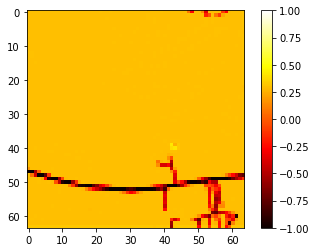

In [50]:
print(encoder_out.shape)
x = encoder_out.cpu().numpy().squeeze()
plt.imshow(x, cmap=plt.cm.hot, vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [43]:
imgs = imgs.cpu()
imgs.shape

torch.Size([1, 3, 512, 512])

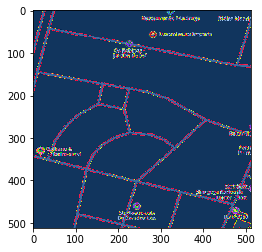

In [44]:
trans = transforms.ToPILImage()
im = trans(imgs.squeeze())
plt.imshow(im)

In [32]:
im.data

AttributeError: 'Image' object has no attribute 'data'

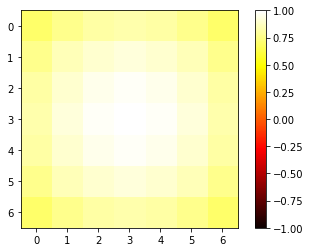

In [59]:
import torch
import numpy as np 
from scipy import signal 

def gkern(kernlen=21, std=3): 
    """Returns a 2D Gaussian kernel array.""" 
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1) 
    gkern2d = np.outer(gkern1d, gkern1d) 
    return gkern2d

x = gkern(7,5)

plt.imshow(x, cmap=plt.cm.hot, vmin=-1, vmax=1)
plt.colorbar()
plt.show()

In [58]:
ker = torch.tensor(x)
ker

tensor([[1.2341e-04, 1.5034e-03, 6.7379e-03, 1.1109e-02, 6.7379e-03, 1.5034e-03,
         1.2341e-04],
        [1.5034e-03, 1.8316e-02, 8.2085e-02, 1.3534e-01, 8.2085e-02, 1.8316e-02,
         1.5034e-03],
        [6.7379e-03, 8.2085e-02, 3.6788e-01, 6.0653e-01, 3.6788e-01, 8.2085e-02,
         6.7379e-03],
        [1.1109e-02, 1.3534e-01, 6.0653e-01, 1.0000e+00, 6.0653e-01, 1.3534e-01,
         1.1109e-02],
        [6.7379e-03, 8.2085e-02, 3.6788e-01, 6.0653e-01, 3.6788e-01, 8.2085e-02,
         6.7379e-03],
        [1.5034e-03, 1.8316e-02, 8.2085e-02, 1.3534e-01, 8.2085e-02, 1.8316e-02,
         1.5034e-03],
        [1.2341e-04, 1.5034e-03, 6.7379e-03, 1.1109e-02, 6.7379e-03, 1.5034e-03,
         1.2341e-04]], dtype=torch.float64)

In [75]:
torch.nn.functional.pad(ker.unsqueeze(0).unsqueeze(0),(1,1,1,1),'reflect')

tensor([[[[ 3.7201e-44, 2.6692e-109,  3.7201e-44,  1.9287e-22,  3.7201e-44,
           2.6692e-109,  3.7201e-44],
          [2.6692e-109, 1.9152e-174, 2.6692e-109,  1.3839e-87, 2.6692e-109,
           1.9152e-174, 2.6692e-109],
          [ 3.7201e-44, 2.6692e-109,  3.7201e-44,  1.9287e-22,  3.7201e-44,
           2.6692e-109,  3.7201e-44],
          [ 1.9287e-22,  1.3839e-87,  1.9287e-22,  1.0000e+00,  1.9287e-22,
            1.3839e-87,  1.9287e-22],
          [ 3.7201e-44, 2.6692e-109,  3.7201e-44,  1.9287e-22,  3.7201e-44,
           2.6692e-109,  3.7201e-44],
          [2.6692e-109, 1.9152e-174, 2.6692e-109,  1.3839e-87, 2.6692e-109,
           1.9152e-174, 2.6692e-109],
          [ 3.7201e-44, 2.6692e-109,  3.7201e-44,  1.9287e-22,  3.7201e-44,
           2.6692e-109,  3.7201e-44]]]], dtype=torch.float64)

In [65]:
ker..shape

torch.Size([5, 5])

In [89]:
x = torch.arange(0,25).reshape(5,5).to(torch.float)

In [93]:
x = x.reshape(1,1,5,5)
x

tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])

In [97]:
import torch.nn.functional as F

index = torch.tensor([[-1, -1], [0.1, 0.1]], dtype=torch.float).reshape(1,1,-1,2)
F.grid_sample(x,index)

tensor([[[[ 0.0000, 13.2000]]]])

In [98]:
x.shape

torch.Size([1, 1, 5, 5])

In [99]:
x.reshape(1,1,5,5)

tensor([[[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]])